# General settings and import of libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Importing the data and exploration

In [4]:
df_train = pd.read_csv('C:\\Users\\Właściciel\\Desktop\\SGHahahaha\\Wskaźniki\\data_DS_HW_train.csv', 
                       error_bad_lines=False, sep=';')

<ipython-input-4-b75affe65f14>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_train = pd.read_csv('C:\\Users\\Właściciel\\Desktop\\SGHahahaha\\Wskaźniki\\data_DS_HW_train.csv',


In [ ]:
# It is important to note of what datatypes your variables are, since ML algorithms cannot handle non-numerical data like strings
# (or like in table below (objects))

In [5]:
df_train.dtypes

application_id                                                     int64
loan_date_created                                                 object
activeloan_coalt                                                   int64
applicationamount                                                  int64
applicationprice                                                  object
avgbetweenapplications                                            object
avgbetweenapprovedapplications                                    object
avgextensions                                                     object
avgloanterm                                                       object
countapplicationsafterlastloanclose                                int64
countrejectedapplications                                          int64
countrejectedapplicationsafterlastloanclose                        int64
customerincomecurrent                                              int64
customerincomeprevious                             

In [ ]:
# Due to the fact that a lot of variables look like floats, it is surprising to see that they are of string datatype. Let's 
# investigate why that is the case

In [6]:
df_train['applicationprice']

0       402,11
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8       160,85
9            0
10           0
11           0
12           0
13       321,7
14      241,27
15      482,54
16           0
17           0
18      482,54
19      434,29
20           0
21           0
22           0
23      160,85
24           0
25           0
26           0
27       80,42
28      112,59
29           0
30      241,27
31           0
32      180,15
33      482,54
34           0
35      482,54
36           0
37           0
38           0
39           0
40       80,42
41      337,78
42           0
43           0
44      482,54
45           0
46           0
47           0
48           0
49           0
50           0
51      402,11
52       321,7
53           0
54           0
55      241,27
56           0
57      217,14
58           0
59           0
60      241,27
61           0
62           0
63      241,27
64      361,91
65       80,42
66       3

In [ ]:
# Looks like the main issue here is that the data contains a comma separator for hundreds and thousands, which is why
# pandas treats these values as strings

In [7]:
# Here I am selecting columns that are going to be converted to floats

columns_to_floats = ['applicationprice', 'avgbetweenapplications', 'avgbetweenapprovedapplications',
                     'avgextensions','avgloanterm', 'income_charge', 'onavgdpd', 'sum_positive_accounts',
                     'amounttotal', 'amounttotalopen', 'swo_ind_active_loans_amount', 'swo_ind_active_loans_open_amount',
                     'swo_ind_loans_amount_p0_1', 'swo_ind_loans_amount_p0_3', 'swo_ind_loans_amount_p0_7',
                     'swo_ind_loans_amount_p0_30', 'swo_ind_loans_amount_p0_90', 'swo_ind_loans_amount_p0_210',
                     'swo_ind_loans_amount_p0_360', 'swo_ind_loans_amount_p0_plus', 'avg_prepaid_days', 'chap_coef', 'avg_dpd',
                     'amount', 'averagepaiddebt', 'sumpaiddebt']


In [8]:
# Here the actual conversion happens, by first replacing commas with dots as separators

df_train[columns_to_floats] = df_train[columns_to_floats].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))


In [9]:
# Now we see that almost all of our columns are either integers or floats. One of the exceptions is loan_date_created, but this
# variable will be ignored since the date should not effect the default of a loan

df_train.dtypes

application_id                                                     int64
loan_date_created                                                 object
activeloan_coalt                                                   int64
applicationamount                                                  int64
applicationprice                                                 float64
avgbetweenapplications                                           float64
avgbetweenapprovedapplications                                   float64
avgextensions                                                    float64
avgloanterm                                                      float64
countapplicationsafterlastloanclose                                int64
countrejectedapplications                                          int64
countrejectedapplicationsafterlastloanclose                        int64
customerincomecurrent                                              int64
customerincomeprevious                             

In [ ]:
# Next step is to recode the other string variables that are floats, but rather a nominal qualitative variables.
# It is important because as mentioned before, ML tools will not be able to handle such values.
# The conversions are done in cells below (it can probably be done with a for loop, but it makes code unclear 
# (at least my code :))

In [10]:
citysize_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}

df_train['citysize'] = df_train['citysize'].map(citysize_mapping)



In [11]:
companiesinhouse_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'UNKNOWN': 5}

df_train['companiesinhouse'] = df_train['companiesinhouse'].map(companiesinhouse_mapping)


In [12]:
housesize_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'UNKNOWN': 5}

df_train['housesize'] = df_train['housesize'].map(housesize_mapping)


In [13]:
householdsize_mapping = {'S': 1, 'M': 2, 'L': 3, 'UNKOWN': 0}

df_train['householdsize'] = df_train['householdsize'].map(householdsize_mapping)


In [14]:
decision_mapping = {'Green': 1, 'Red': 2, 'Yellow': 3}

df_train['decision'] = df_train['decision'].map(decision_mapping)


In [15]:
gender_mapping = {'Male': 1, 'Female': 2}

df_train['gender'] = df_train['gender'].map(gender_mapping)


In [16]:
# Note that for the UNKNOWN and NOT_IDENTIFIED values I did consider replacing them with NaN values, however due to time 
# limitation I simply could not make it - but it is still something worth to consider

housetype_mapping = {'COMPANY_ONLY': 1, 'REGULAR': 2, 'PRIVATE_ONLY': 3, 'SHARED_USAGE': 4, 'UNKNOWN': 5}

df_train['housetype'] = df_train['housetype'].map(housetype_mapping)


In [17]:
identificationtype_mapping = {'IDENTITY_IN_CITY': 1, 'IDENTITY_IN_HOUSE': 2, 'IDENTITY_IN_STREET': 3,
                             'IDENTITY_IN_UNIVERSE': 4, 'LASTNAME_IN_HOUSE': 5, 'NOT_IDENTIFIED': 6}

df_train['identificationtype'] = df_train['identificationtype'].map(identificationtype_mapping)


In [18]:
score_partialdecision_mapping = {'GREEN': 1, 'YELLOW': 2, 'RED': 3}

df_train['score_partialdecision'] = df_train['score_partialdecision'].map(score_partialdecision_mapping)


In [19]:
policyrule_partialdecision_mapping = {'GREEN': 1, 'YELLOW': 2, 'RED': 3}

df_train['policyrule_partialdecision'] = df_train['policyrule_partialdecision'].map(policyrule_partialdecision_mapping)


In [20]:
legalform_mapping = {'PERSON': 1, 'UNKNOWN': 2}

df_train['legalform'] = df_train['legalform'].map(legalform_mapping)


In [21]:
value_mapping = {'ADULT': 1, 'UNKOWN': 2}

df_train['value'] = df_train['value'].map(value_mapping)


In [22]:
# Here I wanted to select categorical columns or columns with qualitative variables, as to separate them from continous ones (floats).
# It was done due to different nature of analysis that can conducted on these kinds of values (for example pearsons correlation)
# was done obviously just for continous variables

categorical_columns = df_train[['value', 'legalform', 'policyrule_partialdecision', 'score_partialdecision',
                               'identificationtype', 'housetype', 'gender', 'decision', 'householdsize',
                               'housesize', 'companiesinhouse', 'citysize']]

In [23]:
# Here just numeric (continous) columns were selected for the reasons mentioned above

numeric_columns = df_train.loc[:, ~df_train.columns.isin(categorical_columns)]

In [24]:
numeric_columns.drop(columns=['application_id', 'loan_date_created'], inplace = True)

<ipython-input-24-c78e291bc6e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns.drop(columns=['application_id', 'loan_date_created'], inplace = True)


In [25]:
numeric_columns.dtypes

activeloan_coalt                                                   int64
applicationamount                                                  int64
applicationprice                                                 float64
avgbetweenapplications                                           float64
avgbetweenapprovedapplications                                   float64
avgextensions                                                    float64
avgloanterm                                                      float64
countapplicationsafterlastloanclose                                int64
countrejectedapplications                                          int64
countrejectedapplicationsafterlastloanclose                        int64
customerincomecurrent                                              int64
customerincomeprevious                                             int64
employmentstatus                                                   int64
income_charge                                      

In [26]:
categorical_columns.columns

Index(['value', 'legalform', 'policyrule_partialdecision',
       'score_partialdecision', 'identificationtype', 'housetype', 'gender',
       'decision', 'householdsize', 'housesize', 'companiesinhouse',
       'citysize'],
      dtype='object')

In [27]:
numeric_columns.describe()

# Noticing very high maximum value for some columns such as customerincomecurrent. It is problematic when dealing with 
# many independent variables that have differnt scales of ranges

,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,customerincomecurrent,customerincomeprevious,employmentstatus,income_charge,onavgdpd,ondpd_coalt,ondpd_ext_coalt,onlastloandpd_ext_coalt,onmaxdpd_coalt,onmaxdpd_ext_coalt,onsex,diff_customerincome,chap_countapplication,chap_countrejectedapplications,max_ondpd,max_ondpd_ext,max_onlastloandpd_ext,max_onmaxdpd,max_onmaxdpd_ext,daysafterregistration,num_positive_accounts,sum_positive_accounts,days_after_first_positive_accounts,days_after_last_positive_accounts,amounttotal,amounttotalopen,count,creditstatusmax,swo_ind_active_loans_amount,swo_ind_active_loans_number,swo_ind_active_loans_open_amount,swo_ind_closed_paid_loans_lenders_number,swo_ind_loans_number,swo_ind_overdue_loans_number,swo_ind_same_ip_different_pesel_count,swo_ind_same_ip_different_pesel_count_unique,chap_coef,correspondence_address_different_pesel_count_p0_1,correspondence_address_different_pesel_count_p0_3,correspondence_address_different_pesel_count_p0_7,correspondence_address_different_pesel_count_p0_30,correspondence_address_different_pesel_count_p0_90,correspondence_address_different_pesel_count_p0_210,correspondence_address_different_pesel_count_p0_360,correspondence_address_different_pesel_count_unique_p0_1,correspondence_address_different_pesel_count_unique_p0_3,correspondence_address_different_pesel_count_unique_p0_7,correspondence_address_different_pesel_count_unique_p0_30,correspondence_address_different_pesel_count_unique_p0_90,correspondence_address_different_pesel_count_unique_p0_210,correspondence_address_different_pesel_count_unique_p0_360,pesel_different_correspondence_address_count_p0_1,pesel_different_correspondence_address_count_p0_3,pesel_different_correspondence_address_count_p0_7,pesel_different_correspondence_address_count_p0_30,pesel_different_correspondence_address_count_p0_90,pesel_different_correspondence_address_count_p0_210,pesel_different_correspondence_address_count_p0_360,pesel_different_correspondence_address_count_unique_p0_1,pesel_different_correspondence_address_count_unique_p0_3,pesel_different_correspondence_address_count_unique_p0_7,pesel_different_correspondence_address_count_unique_p0_30,pesel_different_correspondence_address_count_unique_p0_90,pesel_different_correspondence_address_count_unique_p0_210,pesel_different_correspondence_address_count_unique_p0_360,swo_ind_active_loans_number_p0_1,swo_ind_active_loans_number_p0_3,swo_ind_active_loans_number_p0_7,swo_ind_active_loans_number_p0_30,swo_ind_active_loans_number_p0_90,swo_ind_active_loans_number_p0_210,swo_ind_active_loans_number_p0_360,swo_ind_active_loans_number_p0_plus,swo_ind_canceled_loans_number_p2_90,swo_ind_canceled_loans_number_p2_210,swo_ind_canceled_loans_number_p2_360,swo_ind_canceled_loans_number_p2_plus,swo_ind_loans_amount_p0_1,swo_ind_loans_amount_p0_3,swo_ind_loans_amount_p0_7,swo_ind_loans_amount_p0_30,swo_ind_loans_amount_p0_90,swo_ind_loans_amount_p0_210,swo_ind_loans_amount_p0_360,swo_ind_loans_amount_p0_plus,swo_ind_loans_number_p0_1,swo_ind_loans_number_p0_3,swo_ind_loans_number_p0_7,swo_ind_loans_number_p0_30,swo_ind_loans_number_p0_90,swo_ind_loans_number_p0_210,swo_ind_loans_number_p0_360,swo_ind_loans_number_p0_plus,swo_ind_overdue_loans_number_p0_1,swo_ind_overdue_loans_number_p0_3,swo_ind_overdue_loans_number_p0_7,swo_ind_overdue_loans_number_p0_30,swo_ind_overdue_loans_number_p0_90,swo_ind_overdue_loans_number_p0_210,swo_ind_overdue_loans_number_p0_360,swo_ind_overdue_loans_number_p0_plus,swo_ind_overdue_loans_sum_501_1000_p0_7,swo_ind_overdue_loans_sum_501_1000_p0_30,swo_ind_overdue_loans_sum_501_1000_p0_90,swo_ind_overdue_loans_sum_501_1000_p0_210,swo_ind_overdue_loans_sum_501_1000_p0_360,swo_ind_overdue_loans_sum_501_1000_p0_plus,swo_ind_overdue_loans_sum_1001_5000_p0_3,swo_ind_overdue_loans_sum_100

2147483647

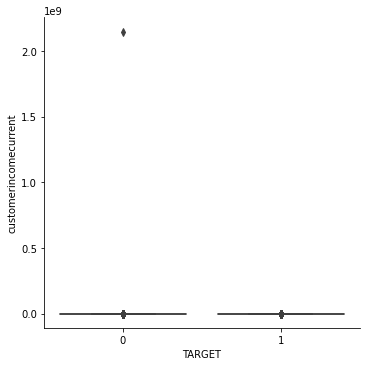

In [28]:
sns.catplot(x='TARGET', y='customerincomecurrent', kind='box', data=numeric_columns)

# An example of how one outlier distords the data within one variable (apparently, someone makes 2147483647 in salary/income)

numeric_columns['customerincomecurrent'].max()


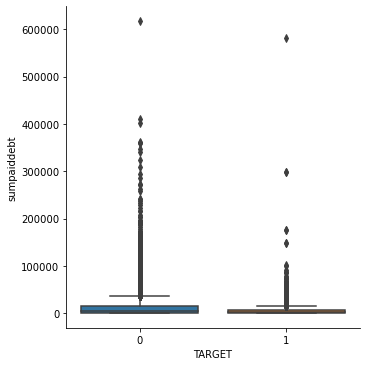

In [29]:
# similar case

sns.catplot(x='TARGET', y='sumpaiddebt', kind='box', data=numeric_columns)


In [32]:
# in order to deal with many different scales of variables, they are normalized using scaler.fit_transform function

columns_to_normalize = numeric_columns.columns

scaler = MinMaxScaler()

numeric_columns[columns_to_normalize] = scaler.fit_transform(numeric_columns[columns_to_normalize])

<ipython-input-32-cc8d9934fcef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns[columns_to_normalize] = scaler.fit_transform(numeric_columns[columns_to_normalize])


In [33]:
numeric_columns.describe()

,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,customerincomecurrent,customerincomeprevious,employmentstatus,income_charge,onavgdpd,ondpd_coalt,ondpd_ext_coalt,onlastloandpd_ext_coalt,onmaxdpd_coalt,onmaxdpd_ext_coalt,onsex,diff_customerincome,chap_countapplication,chap_countrejectedapplications,max_ondpd,max_ondpd_ext,max_onlastloandpd_ext,max_onmaxdpd,max_onmaxdpd_ext,daysafterregistration,num_positive_accounts,sum_positive_accounts,days_after_first_positive_accounts,days_after_last_positive_accounts,amounttotal,amounttotalopen,count,creditstatusmax,swo_ind_active_loans_amount,swo_ind_active_loans_number,swo_ind_active_loans_open_amount,swo_ind_closed_paid_loans_lenders_number,swo_ind_loans_number,swo_ind_overdue_loans_number,swo_ind_same_ip_different_pesel_count,swo_ind_same_ip_different_pesel_count_unique,chap_coef,correspondence_address_different_pesel_count_p0_1,correspondence_address_different_pesel_count_p0_3,correspondence_address_different_pesel_count_p0_7,correspondence_address_different_pesel_count_p0_30,correspondence_address_different_pesel_count_p0_90,correspondence_address_different_pesel_count_p0_210,correspondence_address_different_pesel_count_p0_360,correspondence_address_different_pesel_count_unique_p0_1,correspondence_address_different_pesel_count_unique_p0_3,correspondence_address_different_pesel_count_unique_p0_7,correspondence_address_different_pesel_count_unique_p0_30,correspondence_address_different_pesel_count_unique_p0_90,correspondence_address_different_pesel_count_unique_p0_210,correspondence_address_different_pesel_count_unique_p0_360,pesel_different_correspondence_address_count_p0_1,pesel_different_correspondence_address_count_p0_3,pesel_different_correspondence_address_count_p0_7,pesel_different_correspondence_address_count_p0_30,pesel_different_correspondence_address_count_p0_90,pesel_different_correspondence_address_count_p0_210,pesel_different_correspondence_address_count_p0_360,pesel_different_correspondence_address_count_unique_p0_1,pesel_different_correspondence_address_count_unique_p0_3,pesel_different_correspondence_address_count_unique_p0_7,pesel_different_correspondence_address_count_unique_p0_30,pesel_different_correspondence_address_count_unique_p0_90,pesel_different_correspondence_address_count_unique_p0_210,pesel_different_correspondence_address_count_unique_p0_360,swo_ind_active_loans_number_p0_1,swo_ind_active_loans_number_p0_3,swo_ind_active_loans_number_p0_7,swo_ind_active_loans_number_p0_30,swo_ind_active_loans_number_p0_90,swo_ind_active_loans_number_p0_210,swo_ind_active_loans_number_p0_360,swo_ind_active_loans_number_p0_plus,swo_ind_canceled_loans_number_p2_90,swo_ind_canceled_loans_number_p2_210,swo_ind_canceled_loans_number_p2_360,swo_ind_canceled_loans_number_p2_plus,swo_ind_loans_amount_p0_1,swo_ind_loans_amount_p0_3,swo_ind_loans_amount_p0_7,swo_ind_loans_amount_p0_30,swo_ind_loans_amount_p0_90,swo_ind_loans_amount_p0_210,swo_ind_loans_amount_p0_360,swo_ind_loans_amount_p0_plus,swo_ind_loans_number_p0_1,swo_ind_loans_number_p0_3,swo_ind_loans_number_p0_7,swo_ind_loans_number_p0_30,swo_ind_loans_number_p0_90,swo_ind_loans_number_p0_210,swo_ind_loans_number_p0_360,swo_ind_loans_number_p0_plus,swo_ind_overdue_loans_number_p0_1,swo_ind_overdue_loans_number_p0_3,swo_ind_overdue_loans_number_p0_7,swo_ind_overdue_loans_number_p0_30,swo_ind_overdue_loans_number_p0_90,swo_ind_overdue_loans_number_p0_210,swo_ind_overdue_loans_number_p0_360,swo_ind_overdue_loans_number_p0_plus,swo_ind_overdue_loans_sum_501_1000_p0_7,swo_ind_overdue_loans_sum_501_1000_p0_30,swo_ind_overdue_loans_sum_501_1000_p0_90,swo_ind_overdue_loans_sum_501_1000_p0_210,swo_ind_overdue_loans_sum_501_1000_p0_360,swo_ind_overdue_loans_sum_501_1000_p0_plus,swo_ind_overdue_loans_sum_1001_5000_p0_3,swo_ind_overdue_loans_sum_100

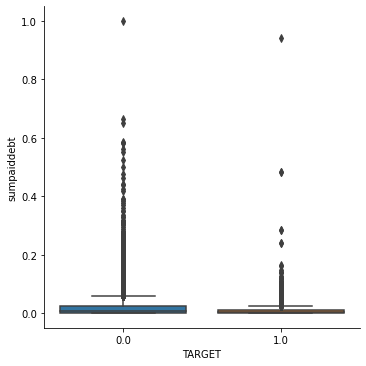

In [34]:
sns.catplot(x='TARGET', y='sumpaiddebt', kind='box', data=numeric_columns)

# Dealing with outliers and imputing the missing values with KNN imputer

In [35]:
# Dealing with outliers with 3 sigma rule, replacing such values with NaNs

numeric_columns = numeric_columns.mask(np.abs(stats.zscore(numeric_columns)) >= 3)


In [36]:
#Imputing missing values with KNN imputer (I realise this might not be the best choice, and it is likely that many things
# could have been done in a better way, but I did not want to spent too much time on finding a perfect solution, but rather
# showing my approach to the task, since I believe that all the best practices on working with this data is something I would
# learn working with you)

imputer = KNNImputer(n_neighbors=10)

transformed_values = imputer.fit_transform(numeric_columns)

numeric_columns = pd.DataFrame(transformed_values, columns=numeric_columns.columns)

In [37]:
# Filling missing values in categorical_columns with mode

for column in categorical_columns.columns:

    if categorical_columns[column].isnull().any():
        mode_values = categorical_columns[column].mode()

        if not mode_values.empty:
            mode_value = mode_values.iloc[0]

            categorical_columns[column] = categorical_columns[column].fillna(mode_value)
        else:
            print(f"Skipping filling missing values for {column} as it has no mode.")


Skipping filling missing values for gender as it has no mode.
Skipping filling missing values for decision as it has no mode.


<ipython-input-37-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].fillna(mode_value)
<ipython-input-37-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].fillna(mode_value)
<ipython-input-37-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [38]:
# Here I decided that since there are a lot of columns that there must be a lot of noise and highly correlated variables, which
# is not ideal. Altough I was missing explanation on what each variable actually means anyone can tell that for example variables
# swo_ind_loans_amount_p0_1 and swo_ind_loans_amount_p0_3 seem to share similar information. Since they are continous variables
# I decided to check for Pearsons correlation and drop variables that shared more than 0.75 correlation.


corr_matrix = numeric_columns.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features with high correlation between each other
numeric_columns.drop(to_drop, axis=1, inplace=True)

In [42]:
y = numeric_columns['TARGET']

In [43]:
# Here I decided to try and use point_biserial correlation, which is used to check for influnce that continous variables have
# over a binary (target) variable. The results were a foundation on which I chose some continous variables for my X features.


point_biserial_results = {}

for x_column in numeric_columns.columns:
    correlation, p_value = stats.pointbiserialr(y, numeric_columns[x_column])
    point_biserial_results[x_column] = {'correlation': correlation, 'p_value': p_value}
    
sorted_results = sorted(point_biserial_results.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [44]:
for x_column, result in sorted_results:
    print(f"Point-Biserial Correlation for {x_column}: {result['correlation']}, p-value: {result['p_value']}")

Point-Biserial Correlation for countapplicationsafterlastloanclose: nan, p-value: nan
Point-Biserial Correlation for chap_countapplication: nan, p-value: nan
Point-Biserial Correlation for chap_coef: 0.25528312642225826, p-value: 1.5417804128270592e-148
Point-Biserial Correlation for num_positive_accounts: -0.16975480429367737, p-value: 1.5468263245807085e-65
Point-Biserial Correlation for days_after_last_positive_accounts: 0.1476053360000037, p-value: 8.070773614787316e-50
Point-Biserial Correlation for swo_ind_closed_paid_loans_lenders_number: -0.13558366232407373, p-value: 3.062284446174151e-42
Point-Biserial Correlation for countrejectedapplications: 0.12083605633376097, p-value: 7.639946588140918e-34
Point-Biserial Correlation for sum_positive_accounts: -0.11621700437554447, p-value: 2.0458332278939723e-31
Point-Biserial Correlation for amounttotal: 0.08916204373828698, p-value: 4.150406823141133e-19
Point-Biserial Correlation for swo_ind_active_loans_amount: -0.07560047277911852,

In [45]:
categorical_columns.drop(columns = ['gender', 'value', 'decision'], inplace=True)

<ipython-input-45-31acc07fbf2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns.drop(columns = ['gender', 'value', 'decision'], inplace=True)


In [46]:
categorical_columns.columns

Index(['legalform', 'policyrule_partialdecision', 'score_partialdecision',
       'identificationtype', 'housetype', 'householdsize', 'housesize',
       'companiesinhouse', 'citysize'],
      dtype='object')

In [47]:
binary_columns = df_train[['gender', 'value', 'decision']]

In [956]:
y = df_train['TARGET']

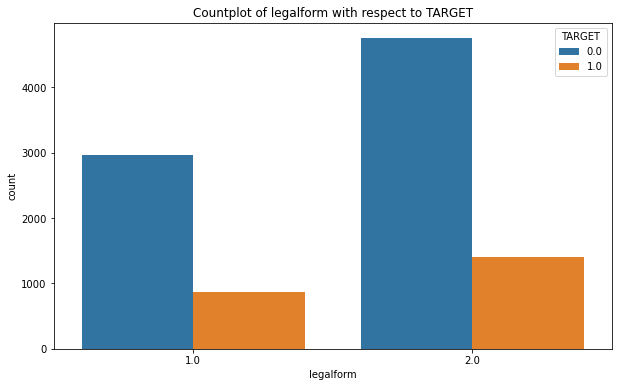

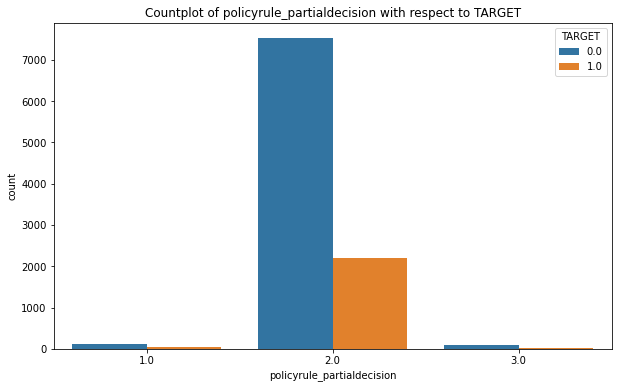

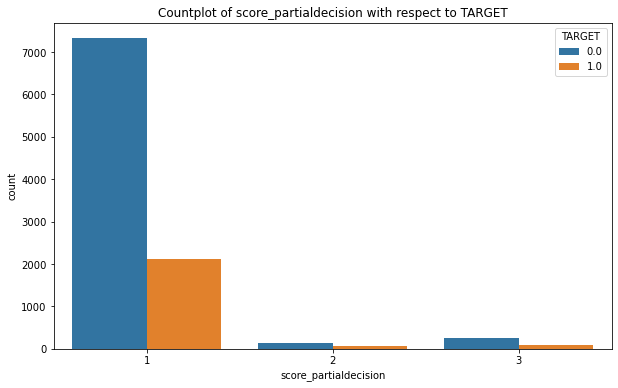

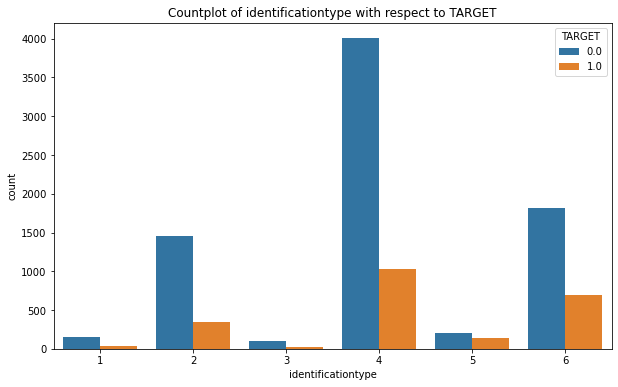

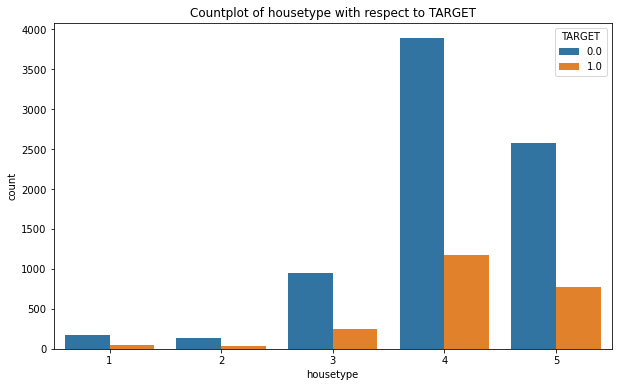

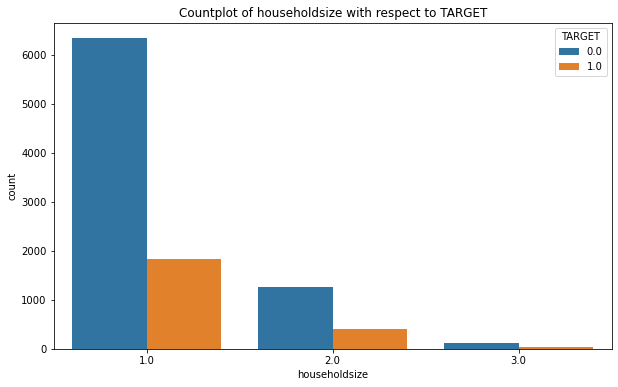

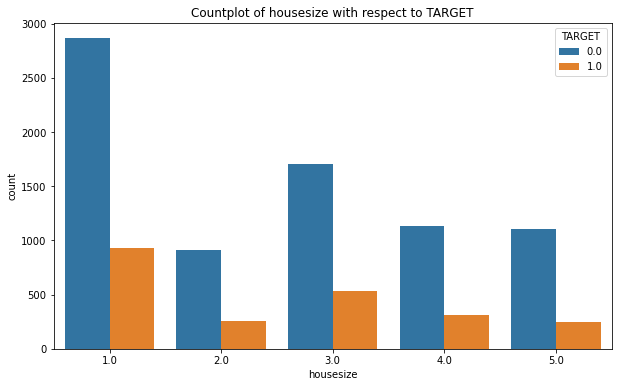

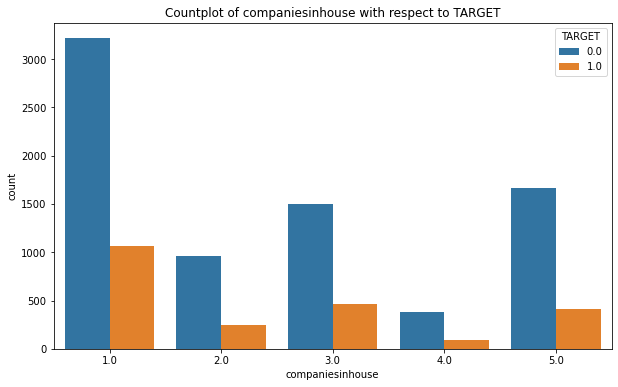

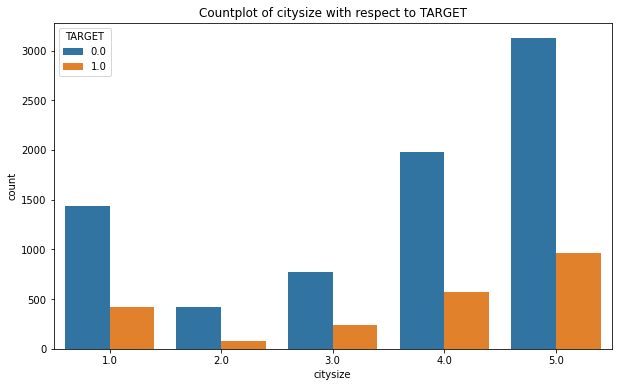

In [48]:
# # Creating countplots of categorical_columns against TARGET variable to help decide which nominal variables influence Y,
# altough I was unsure how to utulize these plots, my thinking was that the more counts of one variable there were for one
# level of binary target, the stronger was the relationship between that variable and Y

for column in categorical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=y, data=pd.DataFrame({column: categorical_columns[column], 'Target': y}))
    plt.title(f'Countplot of {column} with respect to {y.name}')
    plt.show()

In [49]:
# Selecting x - essentialy the features used in my models. Some of them are continous variables with high Point-Biserial Correlation
# that was statistically significant, some were picked more subjectively (eg. customerincomecurrent), and many were not picked 
# because I doubted they made any sense for this task (eg. swo_ind_same_main_address_different_pesel_count_p0_30). However,
# I lacked time and explanation on what these variables actually are, hence I might have been wrong.

x = numeric_columns[['chap_coef', 'num_positive_accounts', 'swo_ind_closed_paid_loans_lenders_number',
                    'count', 'countrejectedapplications', 'sum_positive_accounts', 'customerincomecurrent',
                    ]] 

x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]

<ipython-input-49-c80f5941133f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]
<ipython-input-49-c80f5941133f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]
<ipython-input-49-c80f59

In [50]:
# This part I am a little unsure of, because the task requires me to build a model and evaluate its performance given this dataset
# however it is a training set (at least that is its name). But I decided that I should split this set to train and validation set
# (validation set since the other dataset I got from you is already namde test set). This should work since there are around 10k
# rows.

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=0.33, random_state=4, stratify=y)

In [51]:
# Using logistic regression, since we our dependent variable is binary

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [52]:
y_train_pred = model.predict(x_train)

In [53]:
y_pred = model.predict(x_valid)

In [54]:
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_valid, 
                             model.predict(x_valid))*100)

Training Accuracy :  77.56716417910448
Validation Accuracy :  77.78787878787878


In [ ]:
# Above likely indicates that model is not overfitting, now let's see confusion matrix:

In [55]:
conf_matrix_valid = confusion_matrix(y_valid, y_pred)
TN_valid, FP_valid, FN_valid, TP_valid = conf_matrix_valid.ravel()

print("\nValidation set:")
print(f"True Positives (TP): {TP_valid}")
print(f"True Negatives (TN): {TN_valid}")
print(f"False Positives (FP): {FP_valid}")
print(f"False Negatives (FN): {FN_valid}")


Validation set:
True Positives (TP): 47
True Negatives (TN): 2520
False Positives (FP): 30
False Negatives (FN): 703


In [56]:
FPR_valid = FP_valid / (FP_valid + TN_valid)
print("False Positive Rate (FPR) - Validation set:", FPR_valid)


False Positive Rate (FPR) - Validation set: 0.011764705882352941


In [ ]:
# Above statistics indicate that FP are accounting for a very small share of confusion matrix,
# which is extremely important in case of credit risk and defaulting, however it is not completely
# clear from the task whether 0 or 1 is marked as default

# Hyperparameter tuning

In [ ]:
# Code below might run for some time, however it did not improve model significantly

In [840]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [841]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [842]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.77268658 ...        nan 0.7729846  0.77313387]
  warnings.warn(


In [843]:
best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, penalty='l1', random_state=0,
                   solver='liblinear')

In [845]:
tuned_model = best_clf.best_estimator_

In [847]:
tuned_model.fit(x_valid, y_valid)

y_pred_tuned = tuned_model.predict(x_valid)

In [848]:
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_valid, 
                             tuned_model.predict(x_valid))*100)

Validation Accuracy :  77.6060606060606


In [849]:
conf_matrix_valid = confusion_matrix(y_valid, y_pred_tuned)
TN_valid, FP_valid, FN_valid, TP_valid = conf_matrix_valid.ravel()

print("\nValidation set:")
print(f"True Positives (TP): {TP_valid}")
print(f"True Negatives (TN): {TN_valid}")
print(f"False Positives (FP): {FP_valid}")
print(f"False Negatives (FN): {FN_valid}")


Validation set:
True Positives (TP): 40
True Negatives (TN): 2521
False Positives (FP): 29
False Negatives (FN): 710


In [ ]:
# Tuning the logistic regression model did not yield any additional benefits, next steps will evaluate other ML algorithms

# Building RandomForest model

In [868]:
clf = RandomForestClassifier(n_estimators = 5000, 
                             max_depth = 25, 
                             max_features = 3, 
                             bootstrap = True, 
                             random_state = 18).fit(x_train, y_train)

In [869]:
prediction = clf.predict(x_valid)

In [870]:
confusion_matrix(y_valid, prediction)


array([[2477,   73],
       [ 328,  422]], dtype=int64)

In [876]:
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             clf.predict(x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_valid, 
                             prediction*100))

Training Accuracy :  99.94029850746269
Validation Accuracy :  0.7506060606060606


In [ ]:
# High training accuracy and much lower validation acc indicates that model is overfitting. Unfortunetly I do not have time to 
# keep trying different models and parameters for random forest - which would likely fix the overfitting problem.

# Loading in and transforming df_test to finally run a model (code is basically the same as for df_train, hence no comments were added 

In [57]:
df_test = pd.read_csv('C:\\Users\\Właściciel\\Desktop\\SGHahahaha\\Wskaźniki\\data_DS_HW_test.csv', 
                       error_bad_lines=False, sep=';')

<ipython-input-57-67e108c2f853>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv('C:\\Users\\Właściciel\\Desktop\\SGHahahaha\\Wskaźniki\\data_DS_HW_test.csv',
<ipython-input-57-67e108c2f853>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('C:\\Users\\Właściciel\\Desktop\\SGHahahaha\\Wskaźniki\\data_DS_HW_test.csv',


In [58]:

columns_to_floats = ['applicationprice', 'avgbetweenapplications', 'avgbetweenapprovedapplications',
                     'avgextensions','avgloanterm', 'income_charge', 'onavgdpd', 'sum_positive_accounts',
                     'amounttotal', 'amounttotalopen', 'swo_ind_active_loans_amount', 'swo_ind_active_loans_open_amount',
                     'swo_ind_loans_amount_p0_1', 'swo_ind_loans_amount_p0_3', 'swo_ind_loans_amount_p0_7',
                     'swo_ind_loans_amount_p0_30', 'swo_ind_loans_amount_p0_90', 'swo_ind_loans_amount_p0_210',
                     'swo_ind_loans_amount_p0_360', 'swo_ind_loans_amount_p0_plus', 'avg_prepaid_days', 'chap_coef', 'avg_dpd',
                     'amount', 'averagepaiddebt', 'sumpaiddebt']


In [59]:

df_test[columns_to_floats] = df_test[columns_to_floats].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))


In [60]:

df_test.dtypes

application_id                                                     int64
loan_date_created                                                 object
activeloan_coalt                                                   int64
applicationamount                                                  int64
applicationprice                                                 float64
avgbetweenapplications                                           float64
avgbetweenapprovedapplications                                   float64
avgextensions                                                    float64
avgloanterm                                                      float64
countapplicationsafterlastloanclose                                int64
countrejectedapplications                                          int64
countrejectedapplicationsafterlastloanclose                        int64
customerincomecurrent                                              int64
customerincomeprevious                             

In [61]:
citysize_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}

df_test['citysize'] = df_test['citysize'].map(citysize_mapping)



In [62]:
companiesinhouse_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'UNKNOWN': 5}

df_test['companiesinhouse'] = df_test['companiesinhouse'].map(companiesinhouse_mapping)


In [63]:
housesize_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'UNKNOWN': 5}

df_test['housesize'] = df_test['housesize'].map(housesize_mapping)


In [64]:
householdsize_mapping = {'S': 1, 'M': 2, 'L': 3, 'UNKOWN': 0}

df_test['householdsize'] = df_test['householdsize'].map(householdsize_mapping)


In [65]:
decision_mapping = {'Green': 1, 'Red': 2, 'Yellow': 3}

df_test['decision'] = df_test['decision'].map(decision_mapping)


In [66]:
gender_mapping = {'Male': 1, 'Female': 2}

df_test['gender'] = df_test['gender'].map(gender_mapping)


In [67]:

housetype_mapping = {'COMPANY_ONLY': 1, 'REGULAR': 2, 'PRIVATE_ONLY': 3, 'SHARED_USAGE': 4, 'UNKNOWN': 5}

df_test['housetype'] = df_test['housetype'].map(housetype_mapping)


In [68]:
identificationtype_mapping = {'IDENTITY_IN_CITY': 1, 'IDENTITY_IN_HOUSE': 2, 'IDENTITY_IN_STREET': 3,
                             'IDENTITY_IN_UNIVERSE': 4, 'LASTNAME_IN_HOUSE': 5, 'NOT_IDENTIFIED': 6}

df_test['identificationtype'] = df_test['identificationtype'].map(identificationtype_mapping)


In [69]:
score_partialdecision_mapping = {'GREEN': 1, 'YELLOW': 2, 'RED': 3}

df_test['score_partialdecision'] = df_test['score_partialdecision'].map(score_partialdecision_mapping)


In [70]:
policyrule_partialdecision_mapping = {'GREEN': 1, 'YELLOW': 2, 'RED': 3}

df_test['policyrule_partialdecision'] = df_test['policyrule_partialdecision'].map(policyrule_partialdecision_mapping)


In [71]:
legalform_mapping = {'PERSON': 1, 'UNKNOWN': 2}

df_test['legalform'] = df_test['legalform'].map(legalform_mapping)


In [72]:
value_mapping = {'ADULT': 1, 'UNKOWN': 2}

df_test['value'] = df_test['value'].map(value_mapping)


In [73]:


categorical_columns = df_test[['value', 'legalform', 'policyrule_partialdecision', 'score_partialdecision',
                               'identificationtype', 'housetype', 'gender', 'decision', 'householdsize',
                               'housesize', 'companiesinhouse', 'citysize']]

In [74]:

numeric_columns = df_test.loc[:, ~df_test.columns.isin(categorical_columns)]

In [75]:
numeric_columns.drop(columns=['application_id', 'loan_date_created'], inplace = True)

<ipython-input-75-c78e291bc6e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns.drop(columns=['application_id', 'loan_date_created'], inplace = True)


In [76]:
numeric_columns.dtypes

activeloan_coalt                                                   int64
applicationamount                                                  int64
applicationprice                                                 float64
avgbetweenapplications                                           float64
avgbetweenapprovedapplications                                   float64
avgextensions                                                    float64
avgloanterm                                                      float64
countapplicationsafterlastloanclose                                int64
countrejectedapplications                                          int64
countrejectedapplicationsafterlastloanclose                        int64
customerincomecurrent                                              int64
customerincomeprevious                                             int64
employmentstatus                                                   int64
income_charge                                      

In [77]:
categorical_columns.columns

Index(['value', 'legalform', 'policyrule_partialdecision',
       'score_partialdecision', 'identificationtype', 'housetype', 'gender',
       'decision', 'householdsize', 'housesize', 'companiesinhouse',
       'citysize'],
      dtype='object')

In [78]:
numeric_columns.describe()



,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,customerincomecurrent,customerincomeprevious,employmentstatus,income_charge,onavgdpd,ondpd_coalt,ondpd_ext_coalt,onlastloandpd_ext_coalt,onmaxdpd_coalt,onmaxdpd_ext_coalt,onsex,diff_customerincome,chap_countapplication,chap_countrejectedapplications,max_ondpd,max_ondpd_ext,max_onlastloandpd_ext,max_onmaxdpd,max_onmaxdpd_ext,daysafterregistration,num_positive_accounts,sum_positive_accounts,days_after_first_positive_accounts,days_after_last_positive_accounts,amounttotal,amounttotalopen,count,creditstatusmax,swo_ind_active_loans_amount,swo_ind_active_loans_number,swo_ind_active_loans_open_amount,swo_ind_closed_paid_loans_lenders_number,swo_ind_loans_number,swo_ind_overdue_loans_number,swo_ind_same_ip_different_pesel_count,swo_ind_same_ip_different_pesel_count_unique,chap_coef,correspondence_address_different_pesel_count_p0_1,correspondence_address_different_pesel_count_p0_3,correspondence_address_different_pesel_count_p0_7,correspondence_address_different_pesel_count_p0_30,correspondence_address_different_pesel_count_p0_90,correspondence_address_different_pesel_count_p0_210,correspondence_address_different_pesel_count_p0_360,correspondence_address_different_pesel_count_unique_p0_1,correspondence_address_different_pesel_count_unique_p0_3,correspondence_address_different_pesel_count_unique_p0_7,correspondence_address_different_pesel_count_unique_p0_30,correspondence_address_different_pesel_count_unique_p0_90,correspondence_address_different_pesel_count_unique_p0_210,correspondence_address_different_pesel_count_unique_p0_360,pesel_different_correspondence_address_count_p0_1,pesel_different_correspondence_address_count_p0_3,pesel_different_correspondence_address_count_p0_7,pesel_different_correspondence_address_count_p0_30,pesel_different_correspondence_address_count_p0_90,pesel_different_correspondence_address_count_p0_210,pesel_different_correspondence_address_count_p0_360,pesel_different_correspondence_address_count_unique_p0_1,pesel_different_correspondence_address_count_unique_p0_3,pesel_different_correspondence_address_count_unique_p0_7,pesel_different_correspondence_address_count_unique_p0_30,pesel_different_correspondence_address_count_unique_p0_90,pesel_different_correspondence_address_count_unique_p0_210,pesel_different_correspondence_address_count_unique_p0_360,swo_ind_active_loans_number_p0_1,swo_ind_active_loans_number_p0_3,swo_ind_active_loans_number_p0_7,swo_ind_active_loans_number_p0_30,swo_ind_active_loans_number_p0_90,swo_ind_active_loans_number_p0_210,swo_ind_active_loans_number_p0_360,swo_ind_active_loans_number_p0_plus,swo_ind_canceled_loans_number_p2_90,swo_ind_canceled_loans_number_p2_210,swo_ind_canceled_loans_number_p2_360,swo_ind_canceled_loans_number_p2_plus,swo_ind_loans_amount_p0_1,swo_ind_loans_amount_p0_3,swo_ind_loans_amount_p0_7,swo_ind_loans_amount_p0_30,swo_ind_loans_amount_p0_90,swo_ind_loans_amount_p0_210,swo_ind_loans_amount_p0_360,swo_ind_loans_amount_p0_plus,swo_ind_loans_number_p0_1,swo_ind_loans_number_p0_3,swo_ind_loans_number_p0_7,swo_ind_loans_number_p0_30,swo_ind_loans_number_p0_90,swo_ind_loans_number_p0_210,swo_ind_loans_number_p0_360,swo_ind_loans_number_p0_plus,swo_ind_overdue_loans_number_p0_1,swo_ind_overdue_loans_number_p0_3,swo_ind_overdue_loans_number_p0_7,swo_ind_overdue_loans_number_p0_30,swo_ind_overdue_loans_number_p0_90,swo_ind_overdue_loans_number_p0_210,swo_ind_overdue_loans_number_p0_360,swo_ind_overdue_loans_number_p0_plus,swo_ind_overdue_loans_sum_501_1000_p0_7,swo_ind_overdue_loans_sum_501_1000_p0_30,swo_ind_overdue_loans_sum_501_1000_p0_90,swo_ind_overdue_loans_sum_501_1000_p0_210,swo_ind_overdue_loans_sum_501_1000_p0_360,swo_ind_overdue_loans_sum_501_1000_p0_plus,swo_ind_overdue_loans_sum_1001_5000_p0_3,swo_ind_overdue_loans_sum_100

In [79]:

columns_to_normalize = numeric_columns.columns

scaler = MinMaxScaler()

numeric_columns[columns_to_normalize] = scaler.fit_transform(numeric_columns[columns_to_normalize])

<ipython-input-79-cc8d9934fcef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns[columns_to_normalize] = scaler.fit_transform(numeric_columns[columns_to_normalize])


In [80]:
numeric_columns.describe()

,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,customerincomecurrent,customerincomeprevious,employmentstatus,income_charge,onavgdpd,ondpd_coalt,ondpd_ext_coalt,onlastloandpd_ext_coalt,onmaxdpd_coalt,onmaxdpd_ext_coalt,onsex,diff_customerincome,chap_countapplication,chap_countrejectedapplications,max_ondpd,max_ondpd_ext,max_onlastloandpd_ext,max_onmaxdpd,max_onmaxdpd_ext,daysafterregistration,num_positive_accounts,sum_positive_accounts,days_after_first_positive_accounts,days_after_last_positive_accounts,amounttotal,amounttotalopen,count,creditstatusmax,swo_ind_active_loans_amount,swo_ind_active_loans_number,swo_ind_active_loans_open_amount,swo_ind_closed_paid_loans_lenders_number,swo_ind_loans_number,swo_ind_overdue_loans_number,swo_ind_same_ip_different_pesel_count,swo_ind_same_ip_different_pesel_count_unique,chap_coef,correspondence_address_different_pesel_count_p0_1,correspondence_address_different_pesel_count_p0_3,correspondence_address_different_pesel_count_p0_7,correspondence_address_different_pesel_count_p0_30,correspondence_address_different_pesel_count_p0_90,correspondence_address_different_pesel_count_p0_210,correspondence_address_different_pesel_count_p0_360,correspondence_address_different_pesel_count_unique_p0_1,correspondence_address_different_pesel_count_unique_p0_3,correspondence_address_different_pesel_count_unique_p0_7,correspondence_address_different_pesel_count_unique_p0_30,correspondence_address_different_pesel_count_unique_p0_90,correspondence_address_different_pesel_count_unique_p0_210,correspondence_address_different_pesel_count_unique_p0_360,pesel_different_correspondence_address_count_p0_1,pesel_different_correspondence_address_count_p0_3,pesel_different_correspondence_address_count_p0_7,pesel_different_correspondence_address_count_p0_30,pesel_different_correspondence_address_count_p0_90,pesel_different_correspondence_address_count_p0_210,pesel_different_correspondence_address_count_p0_360,pesel_different_correspondence_address_count_unique_p0_1,pesel_different_correspondence_address_count_unique_p0_3,pesel_different_correspondence_address_count_unique_p0_7,pesel_different_correspondence_address_count_unique_p0_30,pesel_different_correspondence_address_count_unique_p0_90,pesel_different_correspondence_address_count_unique_p0_210,pesel_different_correspondence_address_count_unique_p0_360,swo_ind_active_loans_number_p0_1,swo_ind_active_loans_number_p0_3,swo_ind_active_loans_number_p0_7,swo_ind_active_loans_number_p0_30,swo_ind_active_loans_number_p0_90,swo_ind_active_loans_number_p0_210,swo_ind_active_loans_number_p0_360,swo_ind_active_loans_number_p0_plus,swo_ind_canceled_loans_number_p2_90,swo_ind_canceled_loans_number_p2_210,swo_ind_canceled_loans_number_p2_360,swo_ind_canceled_loans_number_p2_plus,swo_ind_loans_amount_p0_1,swo_ind_loans_amount_p0_3,swo_ind_loans_amount_p0_7,swo_ind_loans_amount_p0_30,swo_ind_loans_amount_p0_90,swo_ind_loans_amount_p0_210,swo_ind_loans_amount_p0_360,swo_ind_loans_amount_p0_plus,swo_ind_loans_number_p0_1,swo_ind_loans_number_p0_3,swo_ind_loans_number_p0_7,swo_ind_loans_number_p0_30,swo_ind_loans_number_p0_90,swo_ind_loans_number_p0_210,swo_ind_loans_number_p0_360,swo_ind_loans_number_p0_plus,swo_ind_overdue_loans_number_p0_1,swo_ind_overdue_loans_number_p0_3,swo_ind_overdue_loans_number_p0_7,swo_ind_overdue_loans_number_p0_30,swo_ind_overdue_loans_number_p0_90,swo_ind_overdue_loans_number_p0_210,swo_ind_overdue_loans_number_p0_360,swo_ind_overdue_loans_number_p0_plus,swo_ind_overdue_loans_sum_501_1000_p0_7,swo_ind_overdue_loans_sum_501_1000_p0_30,swo_ind_overdue_loans_sum_501_1000_p0_90,swo_ind_overdue_loans_sum_501_1000_p0_210,swo_ind_overdue_loans_sum_501_1000_p0_360,swo_ind_overdue_loans_sum_501_1000_p0_plus,swo_ind_overdue_loans_sum_1001_5000_p0_3,swo_ind_overdue_loans_sum_100

# Dealing with outliers and imputing the missing values with KNN imputer

In [81]:

numeric_columns = numeric_columns.mask(np.abs(stats.zscore(numeric_columns)) >= 3)


In [82]:

imputer = KNNImputer(n_neighbors=10)

transformed_values = imputer.fit_transform(numeric_columns)

numeric_columns = pd.DataFrame(transformed_values, columns=numeric_columns.columns)

In [83]:

for column in categorical_columns.columns:

    if categorical_columns[column].isnull().any():
        mode_values = categorical_columns[column].mode()

        if not mode_values.empty:
            mode_value = mode_values.iloc[0]

            categorical_columns[column] = categorical_columns[column].fillna(mode_value)
        else:
            print(f"Skipping filling missing values for {column} as it has no mode.")


Skipping filling missing values for gender as it has no mode.
Skipping filling missing values for decision as it has no mode.


<ipython-input-83-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].fillna(mode_value)
<ipython-input-83-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].fillna(mode_value)
<ipython-input-83-c7a44f0f24e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [84]:

corr_matrix = numeric_columns.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

numeric_columns.drop(to_drop, axis=1, inplace=True)

In [85]:
categorical_columns.drop(columns = ['gender', 'value', 'decision'], inplace=True)

<ipython-input-85-31acc07fbf2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns.drop(columns = ['gender', 'value', 'decision'], inplace=True)


In [86]:
categorical_columns.columns

Index(['legalform', 'policyrule_partialdecision', 'score_partialdecision',
       'identificationtype', 'housetype', 'householdsize', 'housesize',
       'companiesinhouse', 'citysize'],
      dtype='object')

In [87]:
binary_columns = df_test[['gender', 'value', 'decision']]

In [89]:

x = numeric_columns[['chap_coef', 'num_positive_accounts', 'swo_ind_closed_paid_loans_lenders_number',
                    'count', 'countrejectedapplications', 'sum_positive_accounts', 'customerincomecurrent',
                    ]] 


x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]

<ipython-input-89-9fe4d1bddd45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]
<ipython-input-89-9fe4d1bddd45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['citysize', 'householdsize', 'housetype', 'score_partialdecision']] = categorical_columns[['citysize', 'householdsize', 'housetype', 'score_partialdecision']]
<ipython-input-89-9fe4d1

In [90]:
x_test = x

In [91]:

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [92]:
y_test_pred = model.predict(x_test)

In [93]:
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [1057]:
np.savetxt('y_pred.csv', y_test_pred, delimiter=',')
